In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
%matplotlib inline

#                                                       Outline

## Section 1: Decision Trees
#### Section 1.1 Intuition Underlying Tree Based Models
#### Section 1.2 Applying Tree Based Models
#### Section 1.3 Shortcomings & Limitations

## Section 2: Ensemble Methods & Random Forests
#### Section 2.1 Intuition underlying ensemble approaches
#### Section 2.2 Toy Classification Example
#### Section 2.3 Time series Regression Example
#### Section 2.4 MNIST Dataset Classification

# Section 1.1 Intuition Underlying Tree Based Models
### I Spy With My Little Eye...
There is a popular game played by children, during road trips, called "I Spy With My Little Eye". It involves one person choosing something they saw and the other has to infer said something based on a series of yes/no questions.
![alt text](Errata/Fig1.pdf "I Spy With My Little Eye")

During this game, the player partitions the space of total possible objects, with each question defining a new split, till there's just one member left in the accessible space.

For instance, the first question takes away the inanimate objects in the space.
![alt text](Errata/Fig2b.pdf "I Spy With My Little Eye")

The second question removes the 4-legged friends from the picture.
![alt text](Errata/Fig2c.pdf "I Spy With My Little Eye")

The final question removes the terrestrial creatures, in favor of our feathered friends.
![alt text](Errata/Fig2d.pdf "I Spy With My Little Eye")

In mathematical parlance, the little girl is solving a multi-class classification problem using disjoint partitions on the space of measurable events using directed acyclic graphs. Used thus, these DAGs are Classification And Regression Trees.
![alt text](Errata/Fig3a.pdf "I Spy With My Little Eye")

Classification & Regression Trees (CARTs) are non-parametric models, that learn such "splits" on the feature space from data, to define a mapping from different partitions of the feature space to values on the target space.
![alt text](Errata/Fig4.pdf "I Spy With My Little Eye")

# Section 1.2 Applying Tree Based Models
In this section, we apply tree based models to datasets and analyze their performance to visualize their strangths and weaknesses. But first, we start off by generating some data for classification.

Text(0, 0.5, '$X_2$')

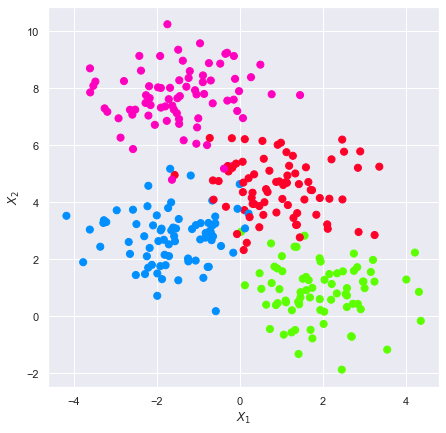

In [2]:
X, y = make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=1)
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

In [5]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In the last code cell, first we instantiate the decision tree model ("tree = DecisionTreeClassifier(max_depth=3)"). 
The second step is fitting the model basde on the data. The process of fitting involves evaluating between a series of splits of the feature space and choosing the best at each step via a greedy approach.

A tree defines a partition on the space, and every node of the tree defines a split of the dataset. The tree is a sequence of splits, chosen based on the data. At every step, possible splits are evaluated based on increase in homogeneity of data due to the split.

![alt text](Errata/Fig5.pdf "I Spy With My Little Eye")

There are various arguments that can be passed to the classifier during instantiation. The primary ones include:

a) max_depth=n,  This determines the number of splits in the tree. 

b) criterion="gini" or "entropy", This determines the criterion used to evaluate the split. 
etc.


We shall experiment over the maximum depth criterion, later. For the moment, let's keep that fixed at 3

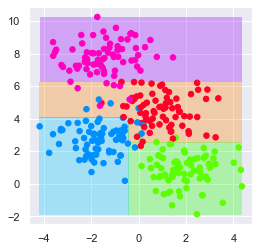

In [6]:
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='gist_rainbow',clim=(y.min(), y.max()), zorder=3)
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]),np.max(X[:,0]), num=200),np.linspace(np.min(X[:,1]),np.max(X[:,1]), num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = plt.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='gist_rainbow', zorder=1)
#plt.savefig('Fig6f.pdf', bbox_inches='tight')

In this step, we vary the maximum depth of the tree from 3 to 6 to 10. As we see in the ensuing figures, the tree's predictions improve a tad, but then quickly devolve to overfitting.
![alt text](Fig6a3.pdf "I Spy With My Little Eye")
![alt text](Fig6c5.pdf "I Spy With My Little Eye")
![alt text](Fig6e10.pdf "I Spy With My Little Eye")

#### Solved Exercise: Classification on the Pima Indian Diabetes Dataset

Diabetes is a condition where the body develops a resistance to insulin. The PIMA Indians of Arizona have been studied for decades and we found that they were extremely prone to adult onset diabetes. In essence, the tribe changed its dietary habits (to modern processed foods). For some stange reason, this caused them to have the highest incidence of diabetes in the entire country.

Here, we'll go through a dataset released by the government, where almost 800 tribe members from Arizona were tested. We measured their blood glucose, their Blood pressures etc...and their diabetes state. Let's see if we can use this data, with a DecisionTree model to create a classifier to predict if a tibesperson has diabetes based on their vitals.

In [9]:
colnames=['Pregnancy','Glucose','BP','Skin','Insulin','BMI','Pedigree','Age','Label']
pima=pd.read_csv("Errata/pima-indians-diabetes.csv",header=None,names=colnames)
pima.head(10)

,Pregnancy,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
feature_column_names=['Pregnancy','Glucose','BP','Skin','Insulin','BMI','Pedigree','Age']
X=pima[feature_column_names]
y=pima.Label

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [40]:
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
ypred=clf.predict(X_test)

In [19]:
print("Decision Tree Classifier Accuracy:", metrics.accuracy_score(y_test,ypred))

Decision Tree Classifier Accuracy: 0.7575757575757576


Over-fitting turns out to be a property of decision trees. It is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. 
![alt text](Fig7.pdf "I Spy With My Little Eye")


# Section 2. Random Forests
In this scenario, we use Ensemble Methods and use a randomized set of such "trees" to create a "forest". The basis of ensemble methods lies in the famous Condorcet’s Jury Theorem: A group wants to arrive at the “correct” decision via majority vote, wherein each individual has a probability p of voting for the correct decision. What should the size of the group be for optimal performance?
It has been shown that if the individual is doing better than random guessing, then the more independent adjudicators in the group, the better the chances of getting the "right" answer.

Intuitive example: The performance of the “Ask The Audience” lifeline in Who Wants To Be A Millionaire? 

(92% accuracy for “Ask The Audience” vs only 65% for “Phone A Friend”)

In this manner, Aggregating randomized models decreases the variance of the ensemble, while still retaining the low bias.

In [ ]:
#Step 1: Split the data into train and test sets (80%-20%)


In [ ]:
# Step 2: Instantiate a random forest classifier model with 100 estimators and a random state of 42. 
# If you complete this exercise early, Feel free to test the max_depth=4/5/6... hyperparameter too.


In [ ]:
# Step 3: Fit the model on the training data, 
#and evaluate its score on the training and the test data (model.score(X_test, y_test))


#### Deriving Insight from the Random Forest Model

In [ ]:
breast_cancer_features = [x for i,x in enumerate(data.feature_names)]
 
def breast_cancer_feature_importances_plot(model):
    plt.figure(figsize=(15,8))
    n_features = 30
    plt.barh(range(n_features), clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), breast_cancer_features)
    plt.title('Random Forest Classifier: Feature Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.ylim(-1, n_features)
 
breast_cancer_feature_importances_plot(clf)
plt.show()

#### Hyperparameter selection for the Random Forest, on the Iris Dataset

A dataset with 150 samples from 3 different types of Iris flowers. The features are the length and width of the petals and sepals of each flower. The target is the type of Iris flower (setosa, virginica, versicolor)

In [66]:
iris=sklearn.datasets.load_iris()
X=iris.data
y=iris.target

X.shape,y.shape

((150, 4), (150,))

In [60]:
params={'n_estimators':[10,20], 'max_features':['sqrt',0.25]}

In [62]:
model=RandomForestClassifier()
clf=GridSearchCV(model,params,cv=5)

In [63]:
model_fin=clf.fit(X,y)

In [64]:
print(model_fin.best_estimator_.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.25, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Exercise

Let's do this Iris classification problem, **properly**.
First, divide the dataset into train and test samples (80%-20%).
Now, use your training data to select the "best" hyperparameters for 

a. the number of estimators (from 10-500) 

b. the maximum features to be between 'sqrt' and different ratios of the toal number of features, from 0.1 to 1.0.

c. the maximum depth of the trees in the ensemble, from 2 to 10.

Train this selected model on the training data, and evaluate its performance on the test dataset.
Report the accuracy of the final model on the training dataset and the test dataset.

## Section 2.2 Random Forests: Time series Regression Example
In the previous section we considered random forests within the context of classification. Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is the RandomForestRegressor, and the syntax is very similar to what we saw earlier.

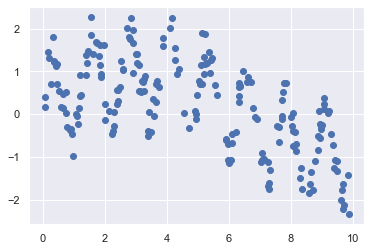

In [67]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def modelts(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = modelts(x)
plt.scatter(x, y)

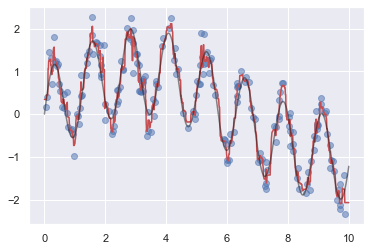

In [68]:
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = modelts(xfit, sigma=0)

plt.scatter(x, y,alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

The true model is shown in the smooth gray curve, while the random forest model is shown by the jagged red curve. As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us needing to specifying a multi-period model.

### Exercise

The Diabetes Dataset: 442 measurements from diabetes patients on features like age, sex, BMI, Blood Pressure, Serum measurements. The target is quantitative measurement of the progress of diabetes one year after these measurements were taken. 

A good ML model would be useful not just to predict the future incidence for new patients, but also evaluate the importance of different features on the progress of the disease.

We'll fit a Random Forest Regressor to this dataset and evaluate it's performance.

a) Split the data into a train-test set (80%-20%)

b) Use cross validation to select good hyperparameters for your Random Forest Regressor

c) Train this selected Random forest model on your training data.

d) evaluate it's performance on the test data.

e) Report the relative importance of different features affecting the progress of diabetes.

In [71]:
dataset=sklearn.datasets.load_diabetes()
X=dataset.data
y=dataset.target

X.shape, y.shape

((442, 10), (442,))

In [72]:
print(dataset.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Section 2.3 Random Forests: MNIST Dataset Classification
As a final example, we apply the Random Forest Algorithm to the (too) well known MNIST dataset, for classifying images

In [ ]:
digits = load_digits()
fig = plt.figure(figsize=(3, 3)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 4, str(digits.target[i]))

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Exercise solutions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8 ,random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))